In [1]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [2]:
%reload_kedro ../

[06/01/25 07:28:35] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=60877;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=114283;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro_telemetry/plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project pimapy                                                   ]8;id=609644;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=815919;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=293758;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=990130;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=931405;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=230383;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [3]:
df_imputed = catalog.load("pima_imputed")
df_imputed.head()

[06/01/25 07:28:55] INFO     Loading data from pima_imputed (CSVDataset)...                     ]8;id=93318;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=865362;file:///Users/rkw/miniconda3/envs/kedro312/lib/python3.12/site-packages/kedro/io/data_catalog.py#403\403]8;;\

,pregnant,glucose,blood_pr,skin_thi,insulin,bmi,dbts_pdgr,age,flag_imp,outcome
0,6.0,148.0,72.0,35.000000,127.477659,33.6,0.627000,50.0,True,1.0
1,1.0,85.0,66.0,29.000000,120.094622,26.6,0.351000,31.0,True,0.0
2,8.0,183.0,64.0,16.168751,298.445158,23.3,0.672000,32.0,True,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,False,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,0.739128,33.0,True,1.0


In [4]:
df_imputed.dtypes


pregnant     float64
glucose      float64
blood_pr     float64
skin_thi     float64
insulin      float64
bmi          float64
dbts_pdgr    float64
age          float64
flag_imp        bool
outcome      float64
dtype: object

In [5]:
from pimapy.pipelines.data_processing.nodes import plot_correlogram

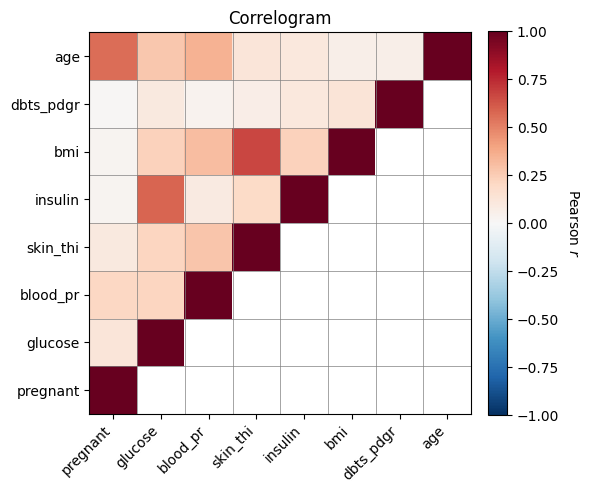

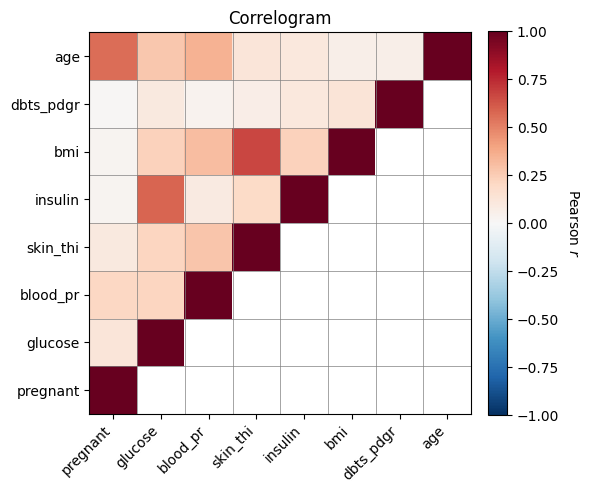

In [6]:
fig = plot_correlogram(df_imputed)
fig

In [8]:
import inspect
from pimapy.pipelines.data_processing.nodes import plot_correlogram

print(inspect.getsource(plot_correlogram))

def plot_correlogram(
    df: pd.DataFrame, 
    exclude_cols: Optional[List[str]] = None, 
    title: str = "Correlogram"
) -> plt.Figure:
    """
    Draw a correlogram (correlation‐matrix heatmap) using pure Matplotlib.
    
    Parameters
    ----------
    df : pd.DataFrame
        Input DataFrame containing numeric columns.
    exclude_cols : Optional[List[str]]
        Columns to drop from the correlation (e.g. ["outcome", "flag_imp"]).
        If None, defaults to excluding "outcome" and "flag_imp" if they exist.
    title : str
        Figure title.
    
    Returns
    -------
    fig : plt.Figure
        The Matplotlib Figure containing the correlogram.
    """
    if exclude_cols is None:
        exclude_cols = []
    # Always drop “outcome” or “flag_imp” if present
    for col in ("outcome", "flag_imp"):
        if col in df.columns and col not in exclude_cols:
            exclude_cols.append(col)

    # 1) Select numeric columns, excluding unwanted ones
    numeric_cols =

In [11]:
import pandas as pd
df_subset = df_imputed.drop(columns=["flag_imp", "outcome"])

In [14]:
corr = df_subset.corr()
corr

,pregnant,glucose,blood_pr,skin_thi,insulin,bmi,dbts_pdgr,age
pregnant,1.000000,0.122675,0.210726,0.097227,0.026469,0.024542,0.008141,0.562250
glucose,0.122675,1.000000,0.211100,0.212103,0.580996,0.228483,0.101136,0.270365
blood_pr,0.210726,0.211100,1.000000,0.273887,0.086363,0.312050,0.036553,0.345538
skin_thi,0.097227,0.212103,0.273887,1.000000,0.192519,0.668873,0.065109,0.123927
insulin,0.026469,0.580996,0.086363,0.192519,1.000000,0.228538,0.104656,0.108623
bmi,0.024542,0.228483,0.312050,0.668873,0.228538,1.000000,0.125122,0.055987
dbts_pdgr,0.008141,0.101136,0.036553,0.065109,0.104656,0.125122,1.000000,0.060258
age,0.562250,0.270365,0.345538,0.123927,0.108623,0.055987,0.060258,1.000000


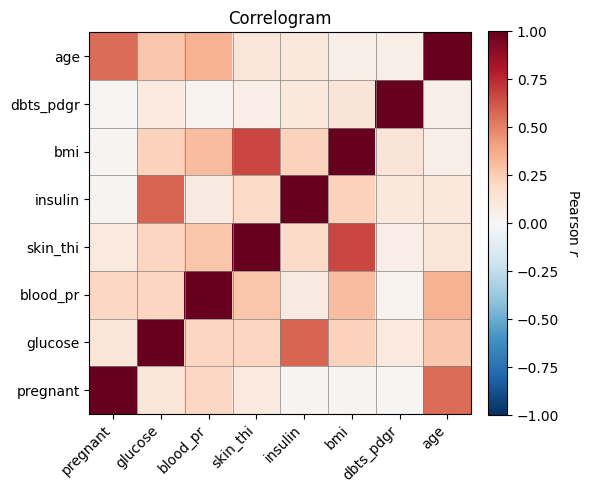

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
plt.close(fig)

# 6) Display with imshow; set cmap to a diverging red‐white‐blue
im = ax.imshow(
        corr.values,
        cmap="RdBu_r",
        vmin=-1, vmax=1,
        interpolation="nearest",
        aspect="equal",
        origin="lower"
    )

cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel("Pearson $r$", rotation=270, labelpad=15)

import numpy as np
n = 8
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
numeric_cols = df_subset.columns.tolist()
ax.set_xticklabels(numeric_cols, rotation=45, ha="right")
ax.set_yticklabels(numeric_cols)

ax.set_xticks(np.arange(n + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(n + 1) - 0.5, minor=True)
ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

ax.set_title("Correlogram")
fig.tight_layout()

fig